## 1. Introduction
- **Objective:** Understand customer purchasing behavior and the impact of various factors on sales.
- **Dataset Overview:** Description of dataset features and target variable.


## 2. Data Loading and Setup
```python
import pandas as pd
# Load the dataset
df = pd.read_csv('path/to/dataset.csv')
# Display the first few rows
df.head()

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
# Import load_data
from load_data import load_data, extract_zip
if __name__ == "__main__":
    # Define file paths and names
    zip_file_path = '../data.zip'
    extract_to_folder = '../data'
    train = 'train.csv'  # Replace with the actual file name if different
    test = 'test.csv'

    # Load the dataset
    try:
        train_data = load_data(zip_file_path, train, extract_to_folder)
        test_data = load_data(zip_file_path, test, extract_to_folder)
        print("Data successfully loaded.")
        display(train_data.head())
    except FileNotFoundError as e:
        print(e)

/home/noh/10Academy/rossmann-pharma-sales-prediction/scripts/load_data.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv(file_path, index_col=0)


Data successfully loaded.


,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
# Explore the testing data
test_data.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
Id,,,,,,,
1,1,4,2015-09-17,1.0,1,0,0
2,3,4,2015-09-17,1.0,1,0,0
3,7,4,2015-09-17,1.0,1,0,0
4,8,4,2015-09-17,1.0,1,0,0
5,9,4,2015-09-17,1.0,1,0,0


In [4]:
# Check the shape of the dataset
print(f'Shape of training dataset:{train_data.shape}')
print(f'Shape of testing dataset:{test_data.shape} ')

Shape of training dataset:(1017209, 8)
Shape of testing dataset:(41088, 7) 


In [5]:
# Check the types of both test and train data
from data_processing import DataProcessing

DataProcessing.check_data_types(train_data, test_data)


Training Dataset Data Types:

DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object


Test Dataset Data Types:

Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object


Differences in column names and data types between training and test datasets:

Column 'Sales' is present in training data but missing in test data.
Column 'Customers' is present in training data but missing in test data.
Data type mismatch for column 'Open':
Train: int64, Test: float64
--------------------------------------------------
Column 'Store' is present in test data but missing in training data.


In [6]:
# Convert the Date column to datetime64 in both training and testing dataset
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Map the StateHolday column from object to int64 in both training and testing dataset
'''     'a': 1,  # Public holiday
        'b': 2,  # Easter holiday
        'c': 3,  # Christmas
        '0': 0   # No holiday
'''
train_data = DataProcessing.convert_state_holiday(train_data)
test_data = DataProcessing.convert_state_holiday(test_data)

Handle Missing Data

- Identify missing values in critical features like `CompetitionDistance`, `Promo2Since`, and `Sales`.
- Impute missing values (e.g., forward-filling for time-based variables or using median/mean for continuous features).



In [17]:
from data_processing import DataProcessing
# create instance of the class

process_train = DataProcessing(train_data)
process_test = DataProcessing(test_data)
# Identify the missing data
print('Summary of Missing Values in Train Data.')
display(process_train.missing_data_summary())
print('Summary of Missing Values in Test Data.')
display(process_test.missing_data_summary())


Summary of Missing Values in Train Data.


,Missing Count,Percentage (%)


Summary of Missing Values in Test Data.


,Missing Count,Percentage (%)


Missing Data Handling for 'Open' in Test Dataset: Since the "Open" variable is crucial for determining whether a store was operational on a given day, we need to handle the missing values in the test dataset carefully.

- Option 1: Impute missing values based on the mode (most frequent value) of the "Open" variable.

- Option 2: Check the surrounding days for each store to infer whether it was likely open or closed on the missing dates.

In [18]:
# Option 1: Impute missing values in 'Open' with mode
test_data.fillna({'Open':test_data['Open'].mode()[0]}, inplace=True)

# Convert the 'Open' column to int64
test_data['Open'] = test_data['Open'].astype(int)

**Outlier Detection using Boxplot**

KeyError: 'CompetitionDistance'

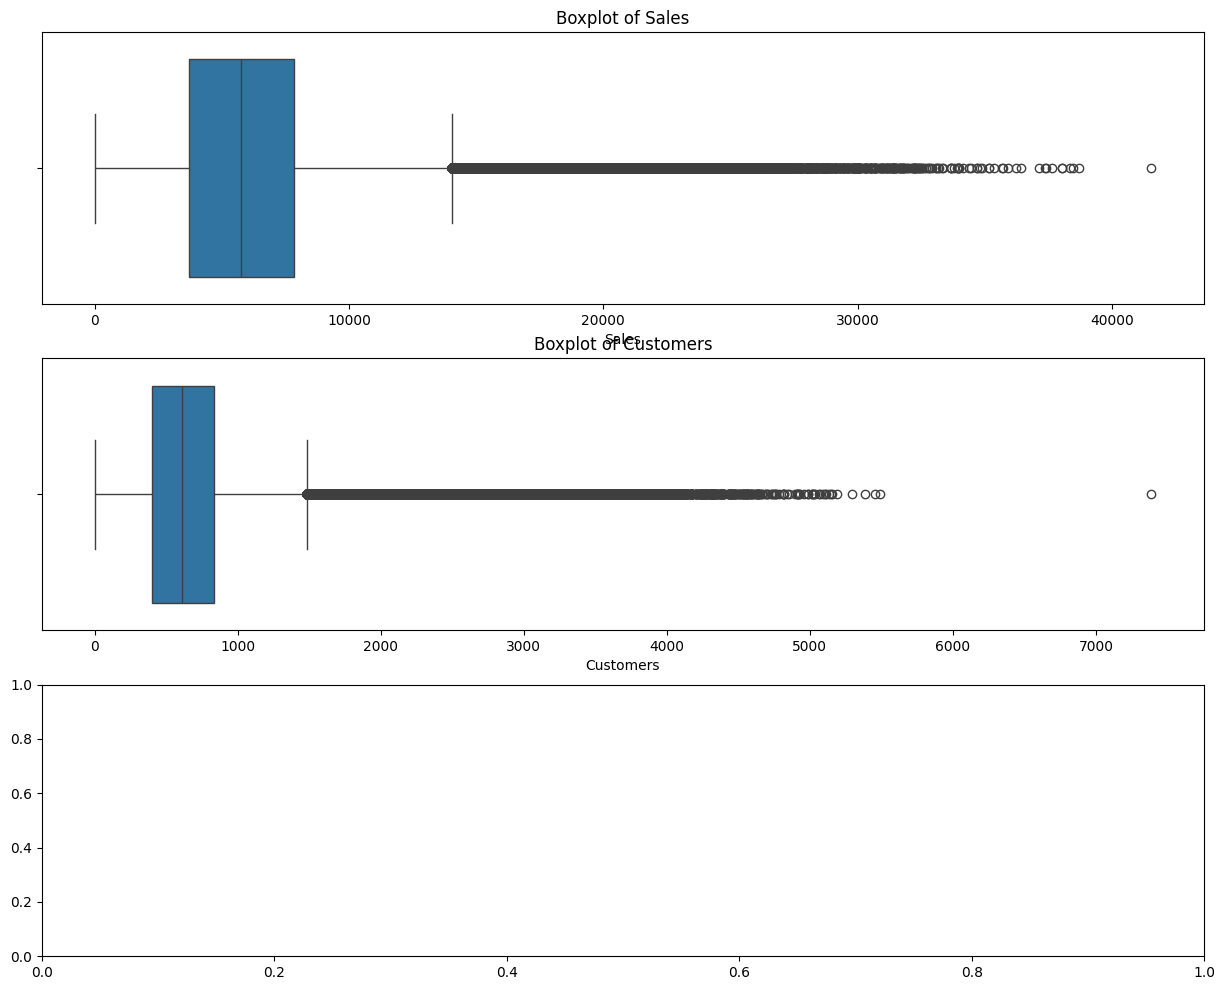

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplots_all_vars(df, vars_to_plot):
    """
    Plot boxplots for all specified variables in a single figure.
    
    Args:
        df (pd.DataFrame): The DataFrame to process.
        vars_to_plot (list of str): List of column names to plot.
    """
    # Create a figure with subplots
    plt.figure(figsize=(15, len(vars_to_plot) * 4))
    
    # Plot each variable in a separate subplot
    for i, var in enumerate(vars_to_plot):
        plt.subplot(len(vars_to_plot), 1, i + 1)
        sns.boxplot(x=df[var])
        plt.title(f'Boxplot of {var}')
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()

# Example usage:
# Replace with your DataFrame and columns to plot
vars_to_plot = ['Sales', 'Customers', 'CompetitionDistance']  # Add all variables you want to analyze
plot_boxplots_all_vars(train_data, vars_to_plot)
